In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Data set\MLL\abalone.csv")

In [4]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()*100

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000
mean,52.399210,40.788125,13.951640,82.874216,35.936749,18.059361,23.883086,993.368446
std,12.009291,9.923987,4.182706,49.038902,22.196295,10.961425,13.920267,322.416903
min,7.500000,5.500000,0.000000,0.200000,0.100000,0.050000,0.150000,100.000000
25%,45.000000,35.000000,11.500000,44.150000,18.600000,9.350000,13.000000,800.000000
50%,54.500000,42.500000,14.000000,79.950000,33.600000,17.100000,23.400000,900.000000
75%,61.500000,48.000000,16.500000,115.300000,50.200000,25.300000,32.900000,1100.000000
max,81.500000,65.000000,113.000000,282.550000,148.800000,76.000000,100.500000,2900.000000


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(4177, 9)

In [17]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

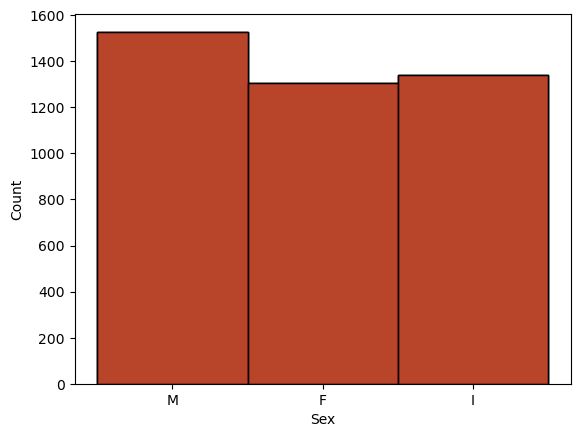

In [22]:
%matplotlib inline

sns.histplot(df['Sex'],bins=20)
plt.show()